In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

<body>
    <h1>To-Do Exercise</h1>
    <h2>Problem 1: Perform a Classification Task with KNN from Scratch</h2>
    <ol>
        <li>
            <strong>Load the Dataset:</strong>
            <ul>
                <li>Read the dataset into a pandas DataFrame.</li>
                <li>Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).</li>
            </ul>
        </li>
        <li>
            <strong>Handle Missing Data:</strong>
            <ul>
                <li>Handle any missing values appropriately, either by dropping or imputing them based on the data.</li>
            </ul>
        </li>
        <li>
            <strong>Feature Engineering:</strong>
            <ul>
                <li>Separate the feature matrix (X) and target variable (y).</li>
                <li>Perform a train-test split from scratch using a 70%-30% ratio.</li>
            </ul>
        </li>
        <li>
            <strong>Implement KNN:</strong>
            <ul>
                <li>Build the KNN algorithm from scratch (no libraries like scikit-learn for KNN).</li>
                <li>Compute distances using Euclidean distance.</li>
                <li>Write functions for predicting the class for a single query and for all test samples.</li>
                <li>Evaluate the performance using accuracy.</li>
            </ul>
        </li>
    </ol>
    
</body>


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/diabetes.csv")
print(data.head())
print(data.info())
print(data.describe())

# Handle Missing Data
missing_info = data.isnull().sum() / len(data) * 100
for column in data.columns:
    if missing_info[column] > 10:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)

# Feature Engineering
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [5]:
# Problem 1: Implement KNN
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true) * 100

predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 67.39%


<h2>Problem 2: Experimentation</h2>
    <ol>
        <li>
            <strong>Repeat the Classification Task:</strong>
            <ul>
                <li>Scale the Feature matrix X.</li>
                <li>Use the scaled data for training and testing the KNN Classifier.</li>
                <li>Record the results.</li>
            </ul>
        </li>
        <li>
            <strong>Comparative Analysis:</strong>
            <ul>
                <li>Compare the accuracy and performance of the KNN model on the original dataset from problem 1 versus the scaled dataset.</li>
                <li>Discuss how scaling impacted the KNN performance and the reason for any observed changes in accuracy.</li>
            </ul>
        </li>
    </ol>

In [8]:
# Problem 2:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
print(f"Scaled Accuracy: {accuracy_scaled:.2f}%")

Scaled Accuracy: 70.87%


<h2>Problem 3: Experimentation with k</h2>
    <ol>
        <li>
            <strong>Vary the Number of Neighbors - k:</strong>
            <ul>
                <li>Run the KNN model on both the original and scaled datasets for a range of k=1,2,3,...,15.</li>
                <li>For each k, record accuracy and time taken to make predictions.</li>
            </ul>
        </li>
        <li>
            <strong>Visualize the Results:</strong>
            <ul>
                <li>Plot graphs for k vs. accuracy and k vs. time taken for original and scaled datasets.</li>
            </ul>
        </li>
        <li>
            <strong>Analyze and Discuss:</strong>
            <ul>
                <li>Discuss how the choice of k affects the accuracy and computational cost.</li>
                <li>Identify the optimal k based on your analysis.</li>
            </ul>
        </li>
    </ol>

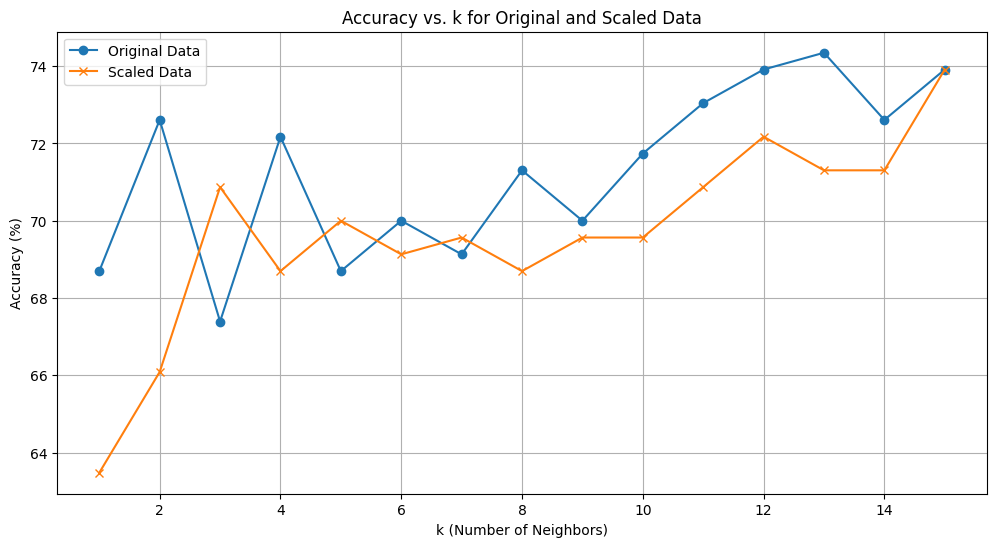

In [10]:
#problem3
k_values = range(1, 16)
accuracies_original = []
accuracies_scaled = []

for k in k_values:
    acc_original = compute_accuracy(y_test, knn_predict(X_test, X_train, y_train, k))
    acc_scaled = compute_accuracy(y_test, knn_predict(X_test_scaled, X_train_scaled, y_train, k))
    accuracies_original.append(acc_original)
    accuracies_scaled.append(acc_scaled)

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies_original, label='Original Data', marker='o')
plt.plot(k_values, accuracies_scaled, label='Scaled Data', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. k for Original and Scaled Data')
plt.legend()
plt.grid(True)
plt.show()